In [1]:
using Revise
using Pkg; Pkg.activate(".")

using Dates
using Statistics
using Interpolations
using DSP
using FFTW
using NCDatasets
using JLD2
using Printf

include("./read_lidar.jl")
using .read_lidar
# using MAT

using PyPlot

  Activating project at `~/Projects/ASTRAL/lidar`


In [33]:
m2n(x) = ismissing(x) ? NaN : x
pd = permutedims

"lidar beam range"
rng(iz, rangegate=24.0) = rangegate * (iz-1 + 0.5)

rng

In [18]:
epsdir = "./epsilon_data"
files = filter(f -> startswith(f, "epsilon_2024") & endswith(f, ".jld2") , readdir(epsdir))

nf = length(files)
epsi = Vector{Matrix{Union{Missing, Float64}}}
c = 0
for f in files
    c += 1
    epsi = load(joinpath(epsdir, f))["epsilon"]
end

LoadError: MethodError: [0mCannot `convert` an object of type [92mInt64[39m[0m to an object of type [91mVector{Matrix{Union{Missing, Float64}}}[39m

[0mClosest candidates are:
[0m  convert(::Type{Array{T, N}}, [91m::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}[39m) where {S, T, N}
[0m[90m   @[39m [36mStaticArrays[39m [90m~/.julia/packages/StaticArrays/YN0oL/src/[39m[90m[4mSizedArray.jl:88[24m[39m
[0m  convert(::Type{Array{T, N}}, [91m::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}[39m) where {T, S, N}
[0m[90m   @[39m [36mStaticArrays[39m [90m~/.julia/packages/StaticArrays/YN0oL/src/[39m[90m[4mSizedArray.jl:82[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  ...


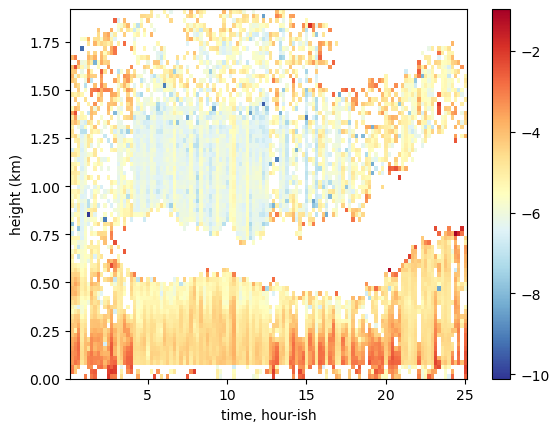

PyObject Text(24.000000000000007, 0.5, 'height (km)')

In [37]:
f = files[2]
epsi = load(joinpath(epsdir, f))["epsilon"]

clf()
pcolormesh((1:size(epsi,1))*24/115, rng.(1:80)/1e3, log10.(pd(m2n.(epsi))), cmap=ColorMap("RdYlBu_r"))
colorbar()
xlabel("time, hour-ish")
ylabel("height (km)")

LoadError: KeyError: key :epsilon not found